### **INITIAL ANALYSIS - Bank Marketing**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn import tree

In [ ]:
# Dataset is from Online Repository
# https://archive.ics.uci.edu/dataset/222/bank+marketing

from google.colab import files
uploaded = files.upload()

import io
bank_data_encoded = pd.read_csv(io.BytesIO(uploaded['bank-full.csv']),delimiter=',')

Saving bank-full.csv to bank-full.csv


In [ ]:
bank_data_encoded.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1     -1         0  unknown  0  
1  unknown    5   may       151         1     -1         0  unknown  0  
2  unknown    5   may        76         1     -1         0  unknown  0  
3  unknown    5   may        92         1     -1         0  unknown  0  
4  unknown    5   may       198         1     -1         0  unknown  0

In [ ]:
bank_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


<Axes: >

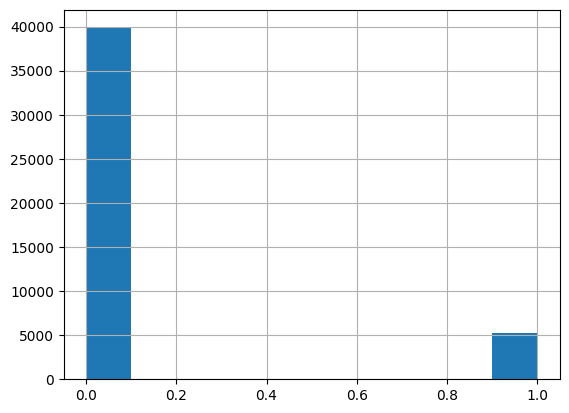

In [ ]:
bank_data_encoded.y.hist()

In [ ]:
bank_data_encoded['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

<Axes: >

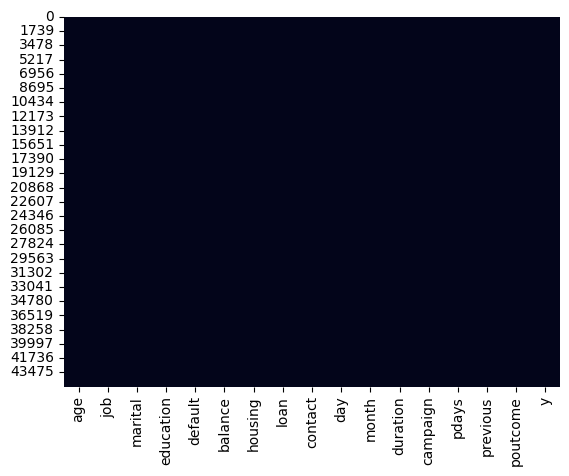

In [ ]:
sns.heatmap(bank_data_encoded.isnull(), cbar=False)

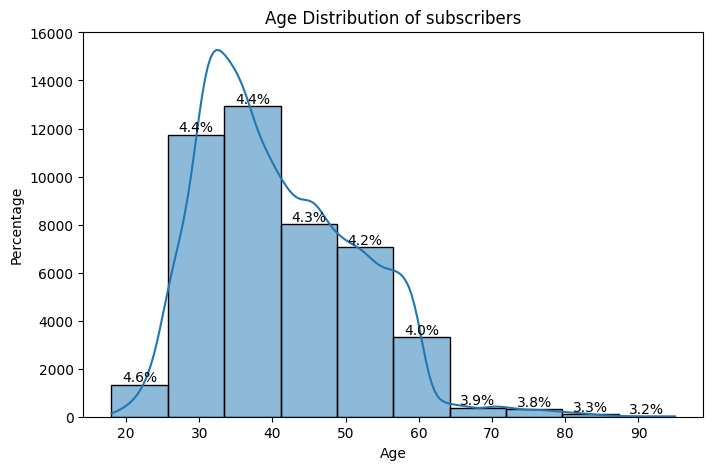

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

age_column = 'age'

total_samples = len(bank_data_encoded)
percentage_values = (bank_data_encoded[age_column].value_counts() / total_samples) * 100

# Create a histogram plot with 10 bins and a density curve
plt.figure(figsize=(8, 5))
ax = sns.histplot(data = bank_data_encoded, x=age_column, bins=10, kde=True)

# Annotate bars with percentages (modify for clarity)
for p, percentage in zip(ax.patches, percentage_values):
    height = p.get_height()
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height),  # Minor adjustment for spacing
                ha='center', va='bottom', fontsize=10, color='black')  # Adjust font size if needed

plt.title("Age Distribution of subscribers")
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.show()


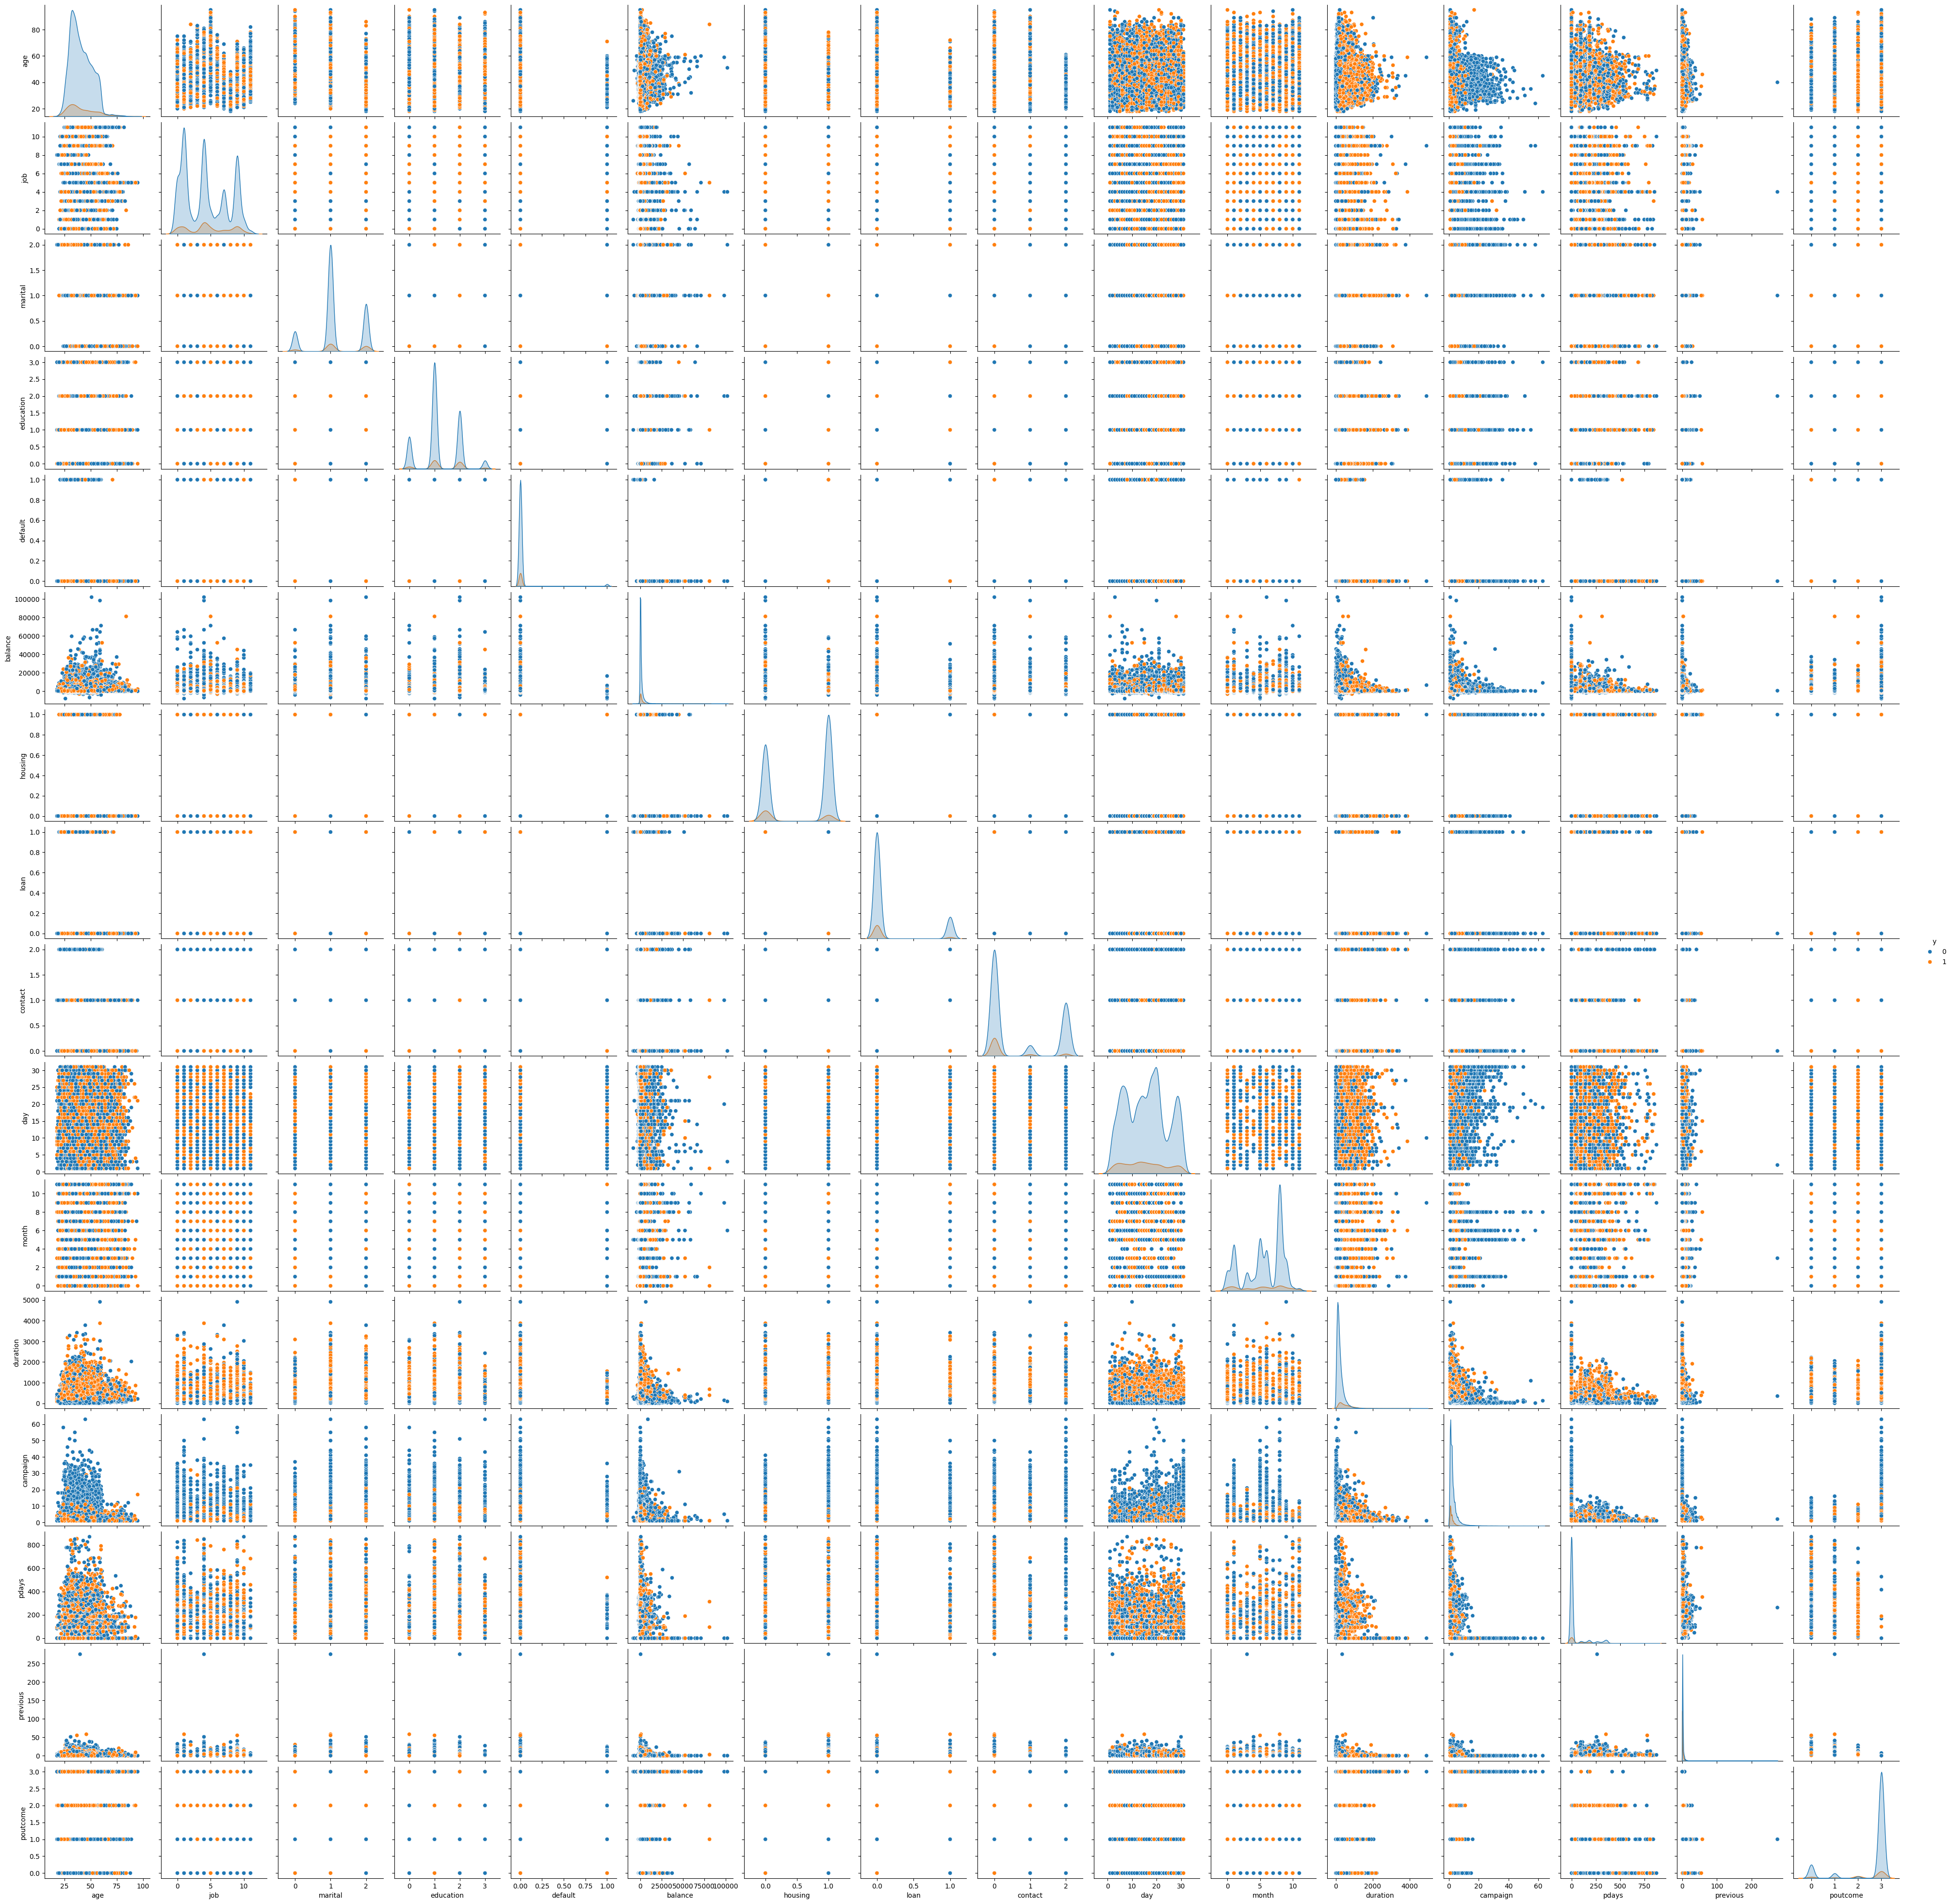

In [ ]:
sns.pairplot(bank_data_encoded, hue = 'y')

The pairplot visualization  showing how the "duration" of calls correlates with "age," "balance," "campaign," "pdays," and "previous" interactions, providing insights into potential relationships and trends.

Distributions:

The pairplot  showing the distribution of call durations and other pertinent variables to help you understand typical call lengths and variable patterns.
Identifying outliers:

The visualization assists identify possible outliers by giving vital information about extraordinary cases or data abnormalities.
Data-driven insights:

The pairplot's insights informing marketing strategies, consumer interaction techniques, and campaign optimization based on identified patterns and relationships in the data.

In [ ]:
bank_data_encoded.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous             y  
count  45211.000000  45211.000000  45211.000000  
mean      40.197828      0.580323      0.116985  
std      100.128746      2.303441      0.321406  
min       -1.000000      0.000000      0.000000  
25%       -1.000000      0.000000      0.000000  
50%       -1.000000      0.000000      0.000000  
75%       -1.000000      0.000000      0.000000  
max      871.000000    275.000000      1.000000

In [ ]:
numeric_data = bank_data_encoded.select_dtypes(include=['float', 'int'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

               age   balance       day  duration  campaign     pdays  \
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758   
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435   
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044   
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565   
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628   
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000   
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820   
y         0.025155  0.052838 -0.028348  0.394521 -0.073172  0.103621   

          previous         y  
age       0.001288  0.025155  
balance   0.016674  0.052838  
day      -0.051710 -0.028348  
duration  0.001203  0.394521  
campaign -0.032855 -0.073172  
pdays     0.454820  0.103621  
previous  1.000000  0.093236  
y         0.093236  1.000000  


#Data pre-processing

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming bank_data is your DataFrame and cat_columns contains your categorical columns
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'y','contact','month','poutcome']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column
for column in cat_columns:
    bank_data_encoded[column] = label_encoder.fit_transform(bank_data_encoded[column])

bank_data_encoded.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0

In [ ]:
# Drop the 'duration' column from the dataset
bank_data = bank_data_encoded.drop('duration', axis=1)

#Logistic Regression

In [ ]:
X = bank_data.drop(columns=['y'])  # Features
y = bank_data['y']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (36168, 15) (36168,)
Testing set shape: (9043, 15) (9043,)


In [ ]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred)

array([[7942,   10],
       [1079,   12]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.55      0.01      0.02      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.50      0.48      9043
weighted avg       0.84      0.88      0.83      9043



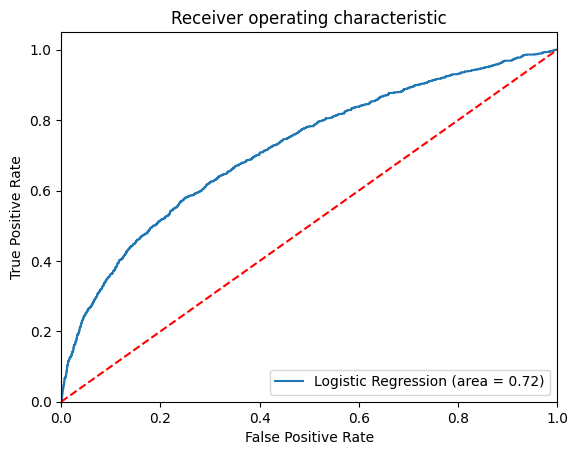

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#kNN Model

In [ ]:
# Rescaling the data for analysis
scaler = MinMaxScaler()
X = bank_data.drop('y', axis=1)
X_rescaled = scaler.fit_transform(X)
X_rescaled = pd.DataFrame(X_rescaled, columns=X.columns)

In [ ]:
X_rescaled.describe()

age           job       marital     education       default  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       0.297873      0.394524      0.583862      0.408271      0.018027   
std        0.137906      0.297514      0.304115      0.249332      0.133049   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.194805      0.090909      0.500000      0.333333      0.000000   
50%        0.272727      0.363636      0.500000      0.333333      0.000000   
75%        0.389610      0.636364      1.000000      0.666667      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            balance       housing          loan       contact           day  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       0.085171      0.555838      0.160226      0.320121      0.493547   
std        0.027643      0.496878      0.366820      0.448975      0.277416   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.073457      0.000000      0.000000      0.000000      0.233333   
50%        0.076871      1.000000      0.000000      0.000000      0.500000   
75%        0.085768      1.000000      0.000000      1.000000      0.666667   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              month      campaign         pdays      previous      poutcome  
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000  
mean       0.502092      0.028449      0.047245      0.002110      0.853325  
std        0.273356      0.049968      0.114827      0.008376      0.329686  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.272727      0.000000      0.000000      0.000000      1.000000  
50%        0.545455      0.016129      0.000000      0.000000      1.000000  
75%        0.727273      0.032258      0.000000      0.000000      1.000000  
max        1.000000      1.000000      1.000000      1.000000      1.000000

In [ ]:
# Develop a kNN model to predict occurrence using k = 5
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7790  162]
 [ 962  129]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7952
           1       0.44      0.12      0.19      1091

    accuracy                           0.88      9043
   macro avg       0.67      0.55      0.56      9043
weighted avg       0.84      0.88      0.84      9043



In [ ]:
from sklearn.metrics import roc_auc_score

print('ROC AUC: ', roc_auc_score(y_test,y_pred))

ROC AUC:  0.5489339566270215


In [ ]:
#optimal value of k based on ROC AUC using cross-validation
max_K = 100
cv_scores = []

for K in range(1, max_K):
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="roc_auc")
    cv_scores.append(scores.mean())


In [ ]:
cv_scores[:4]

[0.5572712680542942, 0.5753184903494523, 0.5891437718132189, 0.598473485087144]

<Axes: >

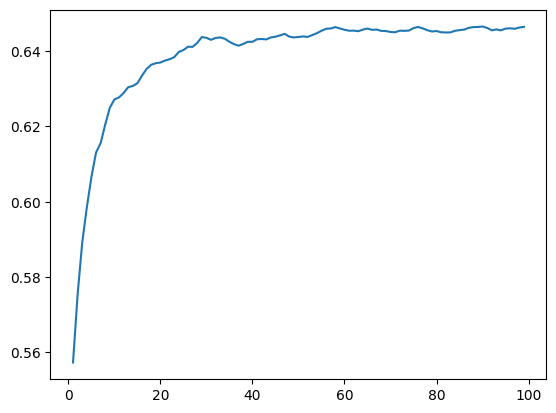

In [ ]:
sns.lineplot(x=range(1,max_K), y=cv_scores)

In [ ]:
# Finding the index of the maximum ROC AUC value
optimal_k_index = np.argmax(cv_scores)

# Retrieving the optimal k value
optimal_k = optimal_k_index + 1  # Adding 1 because K ranges from 1 to max_K, not from 0 to max_K-1

# Retrieving the maximum ROC AUC value
max_roc_auc = cv_scores[optimal_k_index]


print('Optimal k for maximum ROC AUC:', optimal_k)
print('Maximum ROC AUC:', max_roc_auc)

Optimal k for maximum ROC AUC: 90
Maximum ROC AUC: 0.6465734575998985


Optimize knn model with K = 90

In [ ]:
knn = KNeighborsClassifier(n_neighbors=90, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7946    6]
 [1083    8]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.57      0.01      0.01      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.50      0.48      9043
weighted avg       0.84      0.88      0.82      9043



In [ ]:
from sklearn.metrics import roc_auc_score

print('ROC AUC: ', roc_auc_score(y_test,y_pred))

ROC AUC:  0.503289097555083


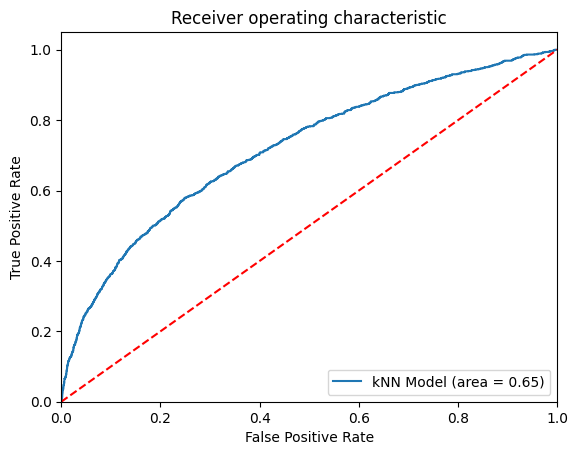

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

kNN_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='kNN Model (area = %0.2f)' % kNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

confusion_matrix(y_test,y_pred_rf)

array([[7928,   24],
       [1026,   65]])

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7952
           1       0.73      0.06      0.11      1091

    accuracy                           0.88      9043
   macro avg       0.81      0.53      0.52      9043
weighted avg       0.87      0.88      0.84      9043



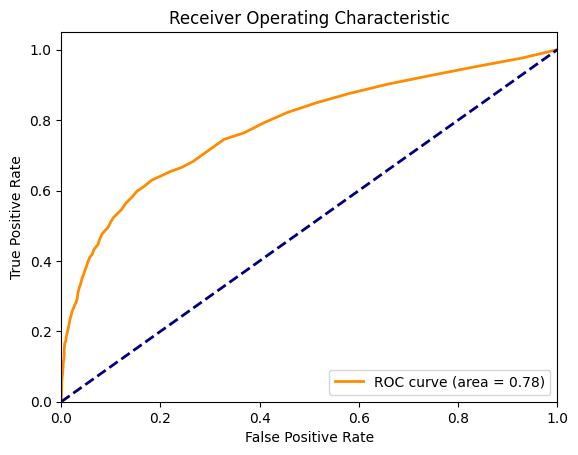

In [ ]:
# Plot ROC curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Boosted Tree

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train,y_train)

y_pred_bt = bt_model.predict(X_test)

confusion_matrix(y_test,y_pred_bt)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


array([[7856,   96],
       [ 903,  188]])

In [ ]:
print(classification_report(y_test,y_pred_bt))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.66      0.17      0.27      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



In [ ]:
from sklearn.metrics import roc_auc_score

print('ROC AUC: ', roc_auc_score(y_test,y_pred))

ROC AUC:  0.503289097555083


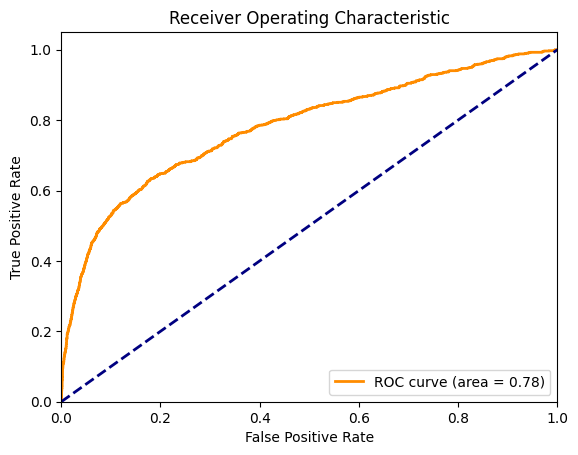

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train the Gradient Boosting model
bt_model = GradientBoostingClassifier()
bt_model.fit(X_train, y_train)

# Predict probabilities for the positive class
ptest = bt_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, ptest)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Naive Bayes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder


In [ ]:
bank_data.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  campaign  pdays  previous  poutcome  y  
0    5      8         1     -1         0         3  0  
1    5      8         1     -1         0         3  0  
2    5      8         1     -1         0         3  0  
3    5      8         1     -1         0         3  0  
4    5      8         1     -1         0         3  0

In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  campaign   45211 non-null  int64
 12  pdays      45211 non-null  int64
 13  previous   45211 non-null  int64
 14  poutcome   45211 non-null  int64
 15  y          45211 non-null  int64
dtypes: int64(16)
memory usage: 5.5 MB


In [ ]:
# Create a Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

In [ ]:
# Fit the model on the training data
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict the labels for the test data
y_pred_nb = nb_model.predict(X_test)

In [ ]:
# Evaluate the model performance
confusion_matrix(y_test, y_pred_nb)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7952
           1       0.24      0.33      0.28      1091

    accuracy                           0.79      9043
   macro avg       0.57      0.59      0.58      9043
weighted avg       0.82      0.79      0.81      9043



In [ ]:
# Calculate the ROC AUC score
nb_roc_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:,1])

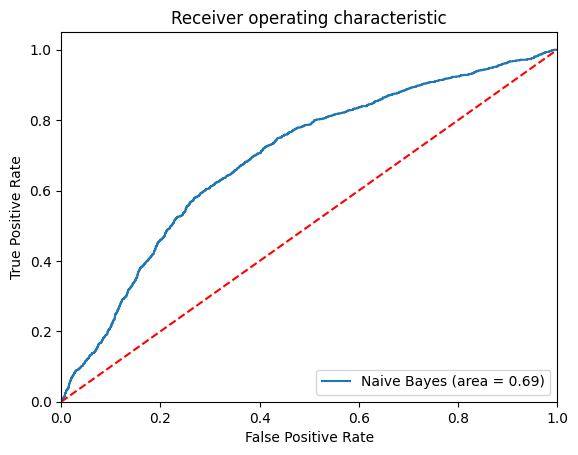

In [ ]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#ANN Model - Tensorflow based neural network

In [ ]:
bank_data.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  campaign  pdays  previous  poutcome  y  
0    5      8         1     -1         0         3  0  
1    5      8         1     -1         0         3  0  
2    5      8         1     -1         0         3  0  
3    5      8         1     -1         0         3  0  
4    5      8         1     -1         0         3  0

In [ ]:
bank_data.shape

(45211, 16)

In [ ]:
# Removed below  columns since they wont be necessarily required for subbscribing a term deposit
bank_data= bank_data.drop(['contact','day', 'month','pdays','previous'],axis=1)

In [ ]:
bank_data.head()

age  job  marital  education  default  balance  housing  loan  campaign  \
0   58    4        1          2        0     2143        1     0         1   
1   44    9        2          1        0       29        1     0         1   
2   33    2        1          1        0        2        1     1         1   
3   47    1        1          3        0     1506        1     0         1   
4   33   11        2          3        0        1        0     0         1   

   poutcome  y  
0         3  0  
1         3  0  
2         3  0  
3         3  0  
4         3  0

In [ ]:
bank_data.tail()

age  job  marital  education  default  balance  housing  loan  \
45206   51    9        1          2        0      825        0     0   
45207   71    5        0          0        0     1729        0     0   
45208   72    5        1          1        0     5715        0     0   
45209   57    1        1          1        0      668        0     0   
45210   37    2        1          1        0     2971        0     0   

       campaign  poutcome  y  
45206         3         3  1  
45207         2         3  1  
45208         5         2  1  
45209         4         3  0  
45210         2         1  0

In [ ]:
print('Incidents of Y: ', bank_data.y.mean())

Incidents of Y:  0.11698480458295547


In [ ]:
bank_data= pd.get_dummies(bank_data)

In [ ]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'campaign', 'poutcome', 'y'],
      dtype='object')

In [ ]:
bank_data.corr()['y'].sort_values(ascending=False)

y            1.000000
education    0.066241
balance      0.052838
marital      0.045588
job          0.040438
age          0.025155
default     -0.022419
loan        -0.068185
campaign    -0.073172
poutcome    -0.077840
housing     -0.139173
Name: y, dtype: float64

In [ ]:
# Preparing features and labels

X = bank_data.drop('y',axis=1).values
y = bank_data['y']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Rescale the data for analysis
scaler = MinMaxScaler()
X = bank_data.drop('y', axis=1)
X_rescaled = scaler.fit_transform(X)
X_rescaled = pd.DataFrame(X_rescaled, columns=X.columns)

In [ ]:
X_rescaled

age       job  marital  education  default   balance  housing  \
0      0.519481  0.363636      0.5   0.666667      0.0  0.092259      1.0   
1      0.337662  0.818182      1.0   0.333333      0.0  0.073067      1.0   
2      0.194805  0.181818      0.5   0.333333      0.0  0.072822      1.0   
3      0.376623  0.090909      0.5   1.000000      0.0  0.086476      1.0   
4      0.194805  1.000000      1.0   1.000000      0.0  0.072812      0.0   
...         ...       ...      ...        ...      ...       ...      ...   
45206  0.428571  0.818182      0.5   0.666667      0.0  0.080293      0.0   
45207  0.688312  0.454545      0.0   0.000000      0.0  0.088501      0.0   
45208  0.701299  0.454545      0.5   0.333333      0.0  0.124689      0.0   
45209  0.506494  0.090909      0.5   0.333333      0.0  0.078868      0.0   
45210  0.246753  0.181818      0.5   0.333333      0.0  0.099777      0.0   

       loan  campaign  poutcome  
0       0.0  0.000000  1.000000  
1       0.0  0.000000  1.000000  
2       1.0  0.000000  1.000000  
3       0.0  0.000000  1.000000  
4       0.0  0.000000  1.000000  
...     ...       ...       ...  
45206   0.0  0.032258  1.000000  
45207   0.0  0.016129  1.000000  
45208   0.0  0.064516  0.666667  
45209   0.0  0.048387  1.000000  
45210   0.0  0.016129  0.333333  

[45211 rows x 10 columns]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X_train.shape

(36168, 15)

In [ ]:
model = Sequential()

model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
# For a binary classification problem
model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
model.fit(x=X_train,
          y=y_train,
          batch_size=64,
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 25.0123 - val_loss: 0.5170
Epoch 2/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.3674 - val_loss: 0.4334
Epoch 3/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6045 - val_loss: 0.3944
Epoch 4/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4794 - val_loss: 0.3796
Epoch 5/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4257 - val_loss: 0.3705
Epoch 6/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3838 - val_loss: 0.3685
Epoch 7/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3697 - val_loss: 0.3682
Epoch 8/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3876 - val_loss: 0.3683
Epoch 9/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3737 - val_loss: 0.3683
Epoch 10/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3669 - val_loss: 0.3683
Epoch 11/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3651 - val_loss: 0.3682
Epoch 12/200
566/566 ━━━━━━━━━━━━━━━━━━━

<Axes: >

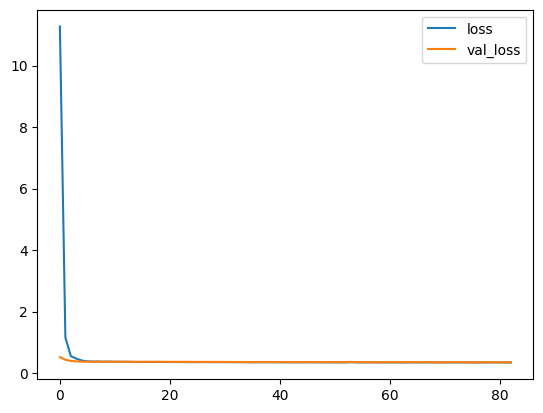

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
y_pred_ann =(model.predict(X_test) > 0.05).astype("int32")

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score

In [ ]:
print(classification_report(y_test,y_pred_ann))


              precision    recall  f1-score   support

           0       0.99      0.01      0.02      7952
           1       0.12      1.00      0.22      1091

    accuracy                           0.13      9043
   macro avg       0.55      0.50      0.12      9043
weighted avg       0.88      0.13      0.04      9043



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[7946    6]
 [1083    8]]


In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,model.predict(X_test)))

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC AUC:  0.6940658040820542


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


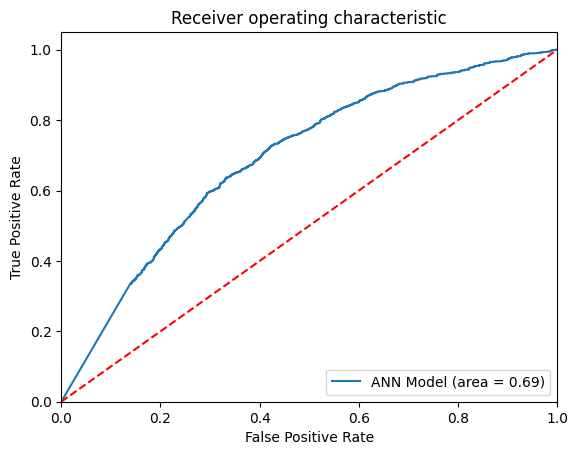

In [ ]:
ann_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='ANN Model (area = %0.2f)' % ann_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **Decision Tree**

In [ ]:
bank_data = pd.get_dummies(bank_data)

In [ ]:
bank_data.describe()

age           job       marital     education       default  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210      4.339762      1.167725      1.224813      0.018027   
std       10.618762      3.272657      0.608230      0.747997      0.133049   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       33.000000      1.000000      1.000000      1.000000      0.000000   
50%       39.000000      4.000000      1.000000      1.000000      0.000000   
75%       48.000000      7.000000      2.000000      2.000000      0.000000   
max       95.000000     11.000000      2.000000      3.000000      1.000000   

             balance       housing          loan      campaign      poutcome  \
count   45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean     1362.272058      0.555838      0.160226      2.763841      2.559974   
std      3044.765829      0.496878      0.366820      3.098021      0.989059   
min     -8019.000000      0.000000      0.000000      1.000000      0.000000   
25%        72.000000      0.000000      0.000000      1.000000      3.000000   
50%       448.000000      1.000000      0.000000      2.000000      3.000000   
75%      1428.000000      1.000000      0.000000      3.000000      3.000000   
max    102127.000000      1.000000      1.000000     63.000000      3.000000   

                  y  
count  45211.000000  
mean       0.116985  
std        0.321406  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [ ]:
dt_model = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)

dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [ ]:
y_pred_dt = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred)

array([[7946,    6],
       [1083,    8]])

In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.71      0.03      0.06      1091

    accuracy                           0.88      9043
   macro avg       0.80      0.51      0.50      9043
weighted avg       0.86      0.88      0.83      9043



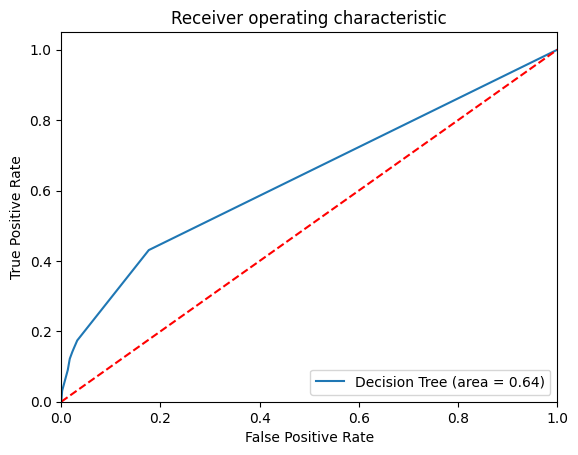

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **Combine plot for ROC AUC curves**

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Function to calculate ROC curve and AUC
def get_roc_curve(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    return fpr, tpr, roc_auc

# Define models
bt_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
rf_model = RandomForestClassifier(random_state=42)
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state=42)

# Assuming 'model' is your pre-trained ANN model
ann_y_pred_prob = model.predict(X_test)  # For ANN

# Calculate ROC for each model
fpr_bt, tpr_bt, bt_roc_auc = get_roc_curve(bt_model, X_train, y_train, X_test, y_test)
fpr_rf, tpr_rf, rf_roc_auc = get_roc_curve(rf_model, X_train, y_train, X_test, y_test)
fpr_nb, tpr_nb, nb_roc_auc = get_roc_curve(nb_model, X_train, y_train, X_test, y_test)
fpr_dt, tpr_dt, dt_roc_auc = get_roc_curve(dt_model, X_train, y_train, X_test, y_test)

# ANN ROC and AUC
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_y_pred_prob)
ann_roc_auc = roc_auc_score(y_test, ann_y_pred_prob)


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:07:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


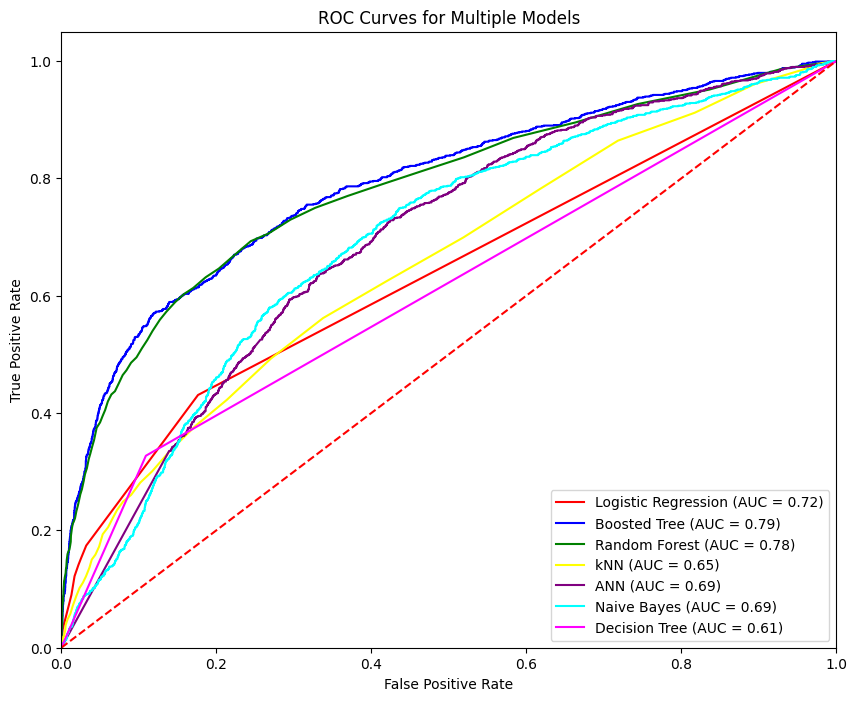

In [ ]:

plt.figure(figsize=(10, 8))

# Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc, color='red')

# Boosted Tree ROC
plt.plot(fpr_bt, tpr_bt, label='Boosted Tree (AUC = %0.2f)' % bt_roc_auc, color='blue')

# Random Forest ROC
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % rf_roc_auc, color='green')

# kNN ROC
plt.plot(knn_fpr, knn_tpr, label='kNN (AUC = %0.2f)' % kNN_roc_auc, color='yellow')

# ANN ROC
plt.plot(fpr_ann, tpr_ann, label='ANN (AUC = %0.2f)' % ann_roc_auc, color='purple')

# Naive Bayes ROC
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = %0.2f)' % nb_roc_auc, color='cyan')

# Decision Tree ROC
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % dt_roc_auc, color='magenta')

# Add diagonal reference line
plt.plot([0, 1], [0, 1], 'r--')

# Labels and Title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend(loc="lower right")
plt.show()


**FINAL ANALYSIS AND CONCLUSION**
  
  The dataset, derived from a bank’s marketing campaign, aimed to predict which customers were most likely to subscribe to a term deposit. Through the analysis and modeling process, we utilized several machine learning models KNN, Random Forest, Boosted Trees, and Naive Baye to identify patterns in customer data, including communication history, financial status, and demographic features.
1. **Preprocessing:**
**•	Data Cleaning:** Missing data were addressed, and categorical features such as job, marital status, and education were encoded into numerical values.
  
  **•	Normalization:** Continuous variables like balance, age, and call duration were standardized to ensure fair model performance, especially for KNN, which is sensitive to feature scales.
2. **Model Performance:**

**Boosted Tree:**consistently deliver high performance across multiple metrics:
Boosted Tree has the highest ROC AUC (0.79), indicating strong classification ability. Its Accuracy is also impressive (0.89).

**Weak Models for Recall:** Logistic Regression, kNN, and Decision Tree suffer from very low Recall scores (0.01–0.03), meaning they struggle to correctly identify positive cases. This makes them less reliable in scenarios where detecting positive cases is crucial.

**ANN (Artificial Neural Network):** Although ANN has the highest Recall (0.97), it has the lowest Accuracy (0.21) and poor F1 Score (0.23). This suggests that the model is overfitting to the positive cases, sacrificing its generalization to the overall data.

**Naive Bayes:** Naive Bayes performs moderately, with reasonable Recall (0.33) and a decent F1 Score (0.28). However, its lower Precision (0.24) indicates that it tends to predict more false positives.

**Accuracy-First Models:** Logistic Regression, Random Forest, kNN, and Decision Tree all have solid Accuracy values (~0.88), indicating good overall performance in predicting the correct class. However, their Recall scores are not optimal, meaning they may miss many positive cases.

**Conclusion:**

For the most balanced performance, Boosted Tree is the top choices based on their combination of high ROC AUC, Precision, and Accuracy. This model should be favored for making accurate predictions. However, if the goal is to detect as many positive cases as possible, ANN could be considered, despite its lower accuracy, due to its excellent Recall. Depending on the business goal—whether minimizing false positives or maximizing positive case detection—the choice of model can be adjusted accordingly.


